# Process Mining
Please make sure your notebook fulfills the following requirements:
- Commented and structured code (if not, this will be penalized in the style points)
- Questions separated by markdown headers
- Top-to-bottom runnable cells to reproduce your results
- It should be runnable in the bundled conda environment.
- Ensure that the code in the notebook runs if placed in the same folder as all of the provided
files, delivering the same outputs as the ones you submit in the notebook and report on
in your report.
- DO NOT CLEAR THE OUTPUT of the notebooks you are submitting!

Also, please do not set any random states in this notebook. We set the following random seeds to ensure that the results are the same.

In [39]:
### Display
from IPython.display import display
## Data Handling
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random

from collections import Counter

In [40]:
# please do not change or delete this cell
random.seed(42)
np.random.seed(42)

## Event Log Exploration
You have received event data of a financing organization's process of offering loans to customers whose application of a loan was accepted. In the event log, every entry describes the state change of an offer,i.e., every entry refers to: 1) the loan application of a customer (case), 2) the state an offer was set to (activity) and 3) a timestamp. Additionally, some additional information is provided for every offer, including the offer ID.

In the provided data, every case describes the process of coming to terms with the customers of accepted loan applications. Hence, every case can include the lifecycles of one or more offers, however, for every case no more than one offer is accepted.
Use Python and PM4PY (https://processintelligence.solutions/static/api/2.7.11/) to explore the event log.

parsing log, completed traces ::   0%|          | 0/11021 [00:00<?, ?it/s]

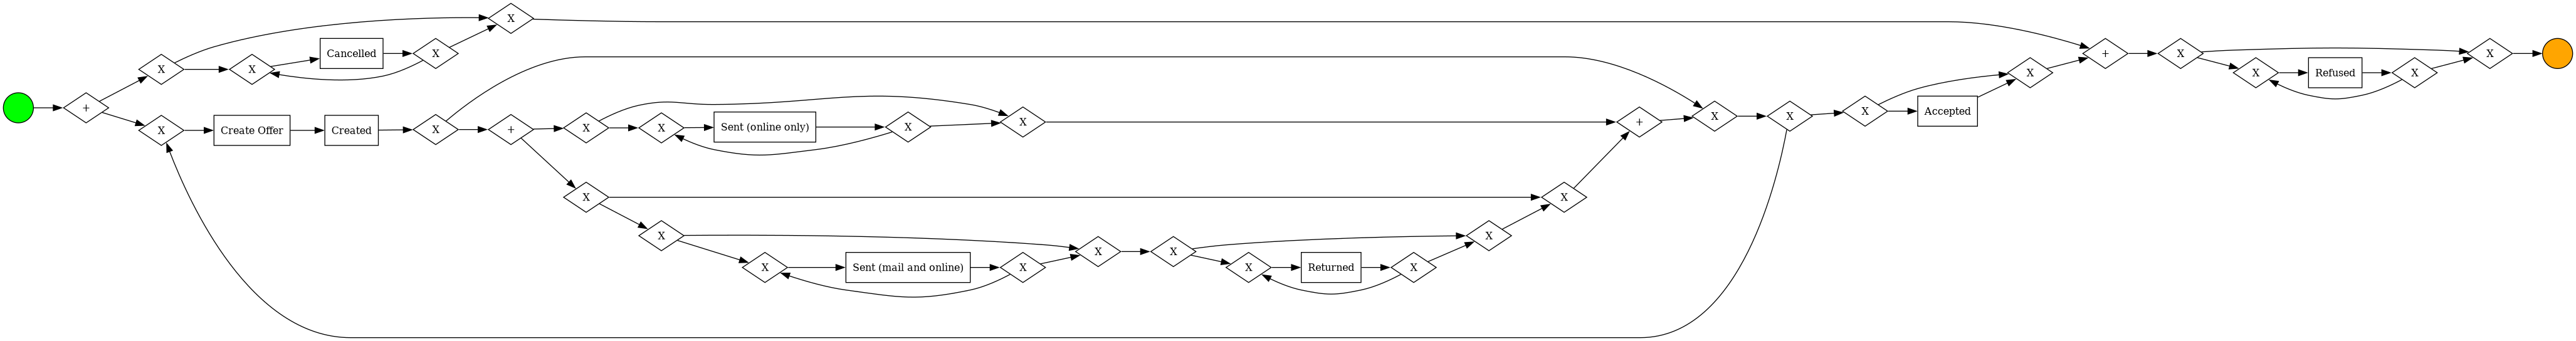

In [41]:
# Load the event log
data = pm4py.read_xes('process_mining/event_log.xes')
process_model = pm4py.discover_bpmn_inductive(data)
pm4py.view_bpmn(process_model)

### Activities and Events
Please leave do not change the activities in the event log -- just leave them as they are in the data. Even if you suspect multiple activity names refer to the same actual activity.

0                  Create Offer
1                       Created
2        Sent (mail and online)
3                     Cancelled
4                  Create Offer
                  ...          
68307              Create Offer
68308                   Created
68309    Sent (mail and online)
68310    Sent (mail and online)
68311                 Cancelled
Name: concept:name, Length: 68312, dtype: object
{'Create Offer': 15188, 'Created': 15188, 'Sent (mail and online)': 13929, 'Cancelled': 7504, 'Returned': 8114, 'Accepted': 6011, 'Sent (online only)': 773, 'Refused': 1605}


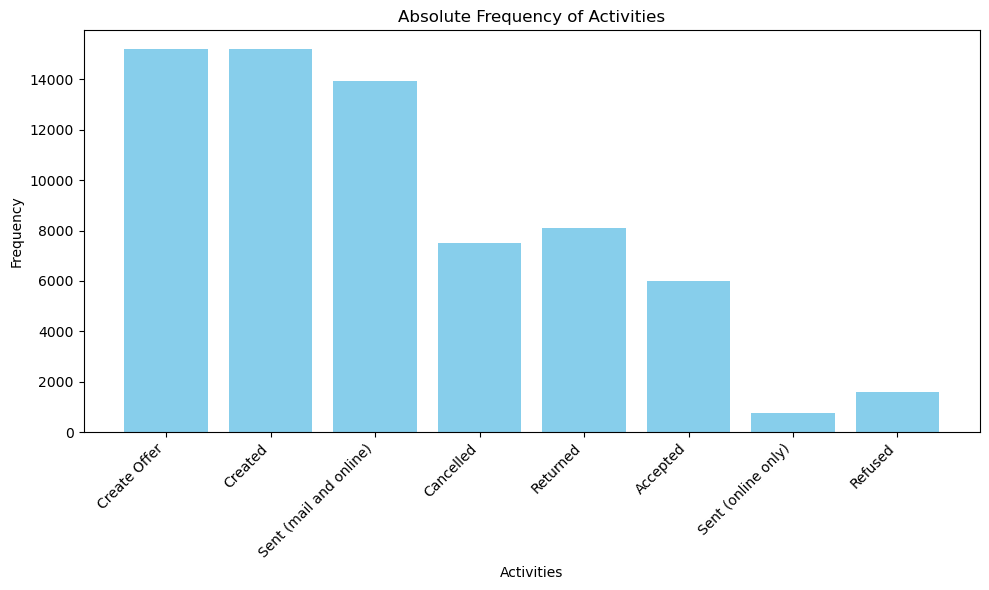

The log consists of multiple traces, each traces consists of multiple events and each event has excatly one
activity. Hence the summed up frequenc of all activities is the number of events. The total number of events is  68312


In [44]:
# number of events and plot showing the frequency of each activity

activities = data["concept:name"]
activityCounts = Counter(activities)

print(activities)

frequencyActivities = dict(activityCounts)
print(frequencyActivities)


plt.figure(figsize=(10, 6))
plt.bar(activitiesList, frequenciesList, color='skyblue')
plt.xlabel('Activities')
plt.ylabel('Frequency')
plt.title('Absolute Frequency of Activities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("""The log consists of multiple traces, each traces consists of multiple events and each event has excatly one
activity. Hence the summed up frequenc of all activities is the number of events. The total number of events is """, len(activities))

### Cases and Offers

In [43]:
# number of cases, offers and mean offers per case

# number of cases
cases = data["case:concept:name"]
casesNumber = cases.nunique()

print("The event log has ", casesNumber, "different cases")

print(data)

# number of offers
offers = data["OfferID"].dropna()
offerNumber = offers.nunique()
print("The total number of offers made is: ", offerNumber)

# mean number of offers per case
meanOffersPerCase = data.groupby('case:concept:name')['OfferID'].count().mean()
print("In the mean ", meanOffersPerCase, " offers have been made per case")

The event log has  11021 different cases
                 concept:name                   time:timestamp  \
0                Create Offer 2016-01-02 14:45:25.611000+00:00   
1                     Created 2016-01-02 14:45:26.830000+00:00   
2      Sent (mail and online) 2016-01-02 14:46:43.295000+00:00   
3                   Cancelled 2016-02-02 07:00:36.975000+00:00   
4                Create Offer 2016-01-02 09:55:46.369000+00:00   
...                       ...                              ...   
68307            Create Offer 2017-01-02 13:34:11.626000+00:00   
68308                 Created 2017-01-02 13:34:12.243000+00:00   
68309  Sent (mail and online) 2017-01-02 13:34:22.594000+00:00   
68310  Sent (mail and online) 2017-01-02 13:34:22.596000+00:00   
68311               Cancelled 2017-01-02 16:05:41.427000+00:00   

       FirstWithdrawalAmount  NumberOfTerms Accepted  MonthlyCost Selected  \
0                        0.0           94.0     True       120.00    False   
1         

## Process Exploration

### Start and End Activities

In [37]:
# start and end activities of the process
startActivities = pm4py.stats.get_start_activities(data)
print(startActivities)

endActivities = pm4py.stats.get_end_activities(data)
print(endActivities)

{'Create Offer': 11021}
{'Cancelled': 5253, 'Accepted': 4442, 'Refused': 1293, 'Returned': 16, 'Sent (mail and online)': 15, 'Sent (online only)': 2}


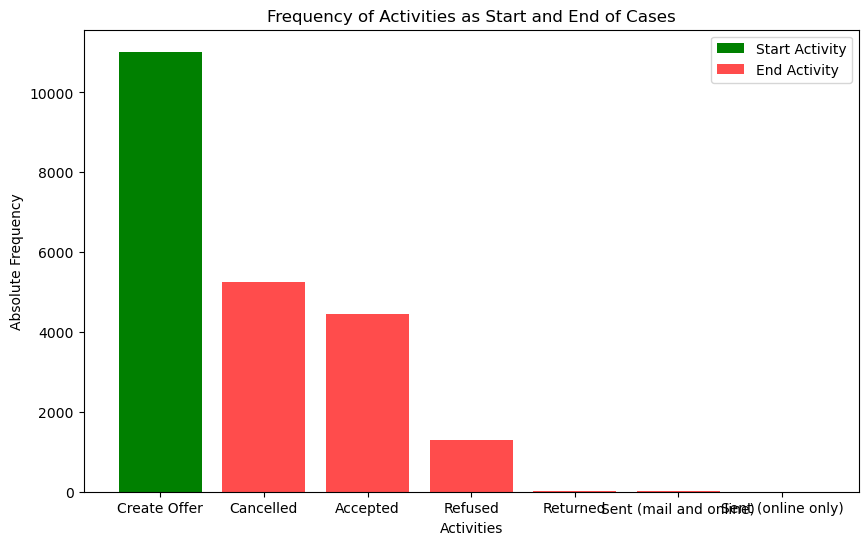

In [50]:
# plot of start and end activities

startActivitiesList = list(startActivities.keys())
startActiviitesFrequencies = list(startActivities.values())


plt.figure(figsize=(10, 6))
plt.bar(list(startActivities.keys()), list(startActivities.values()), color='green', label='Start Activity')
plt.bar(list(endActivities.keys()), list(endActivities.values()), color='red', label='End Activity', alpha=0.7)

plt.xlabel("Activities")
plt.ylabel("Absolute Frequency")
plt.title("Frequency of Activities as Start and End of Cases")
plt.legend()

plt.show()

### Full Process Model

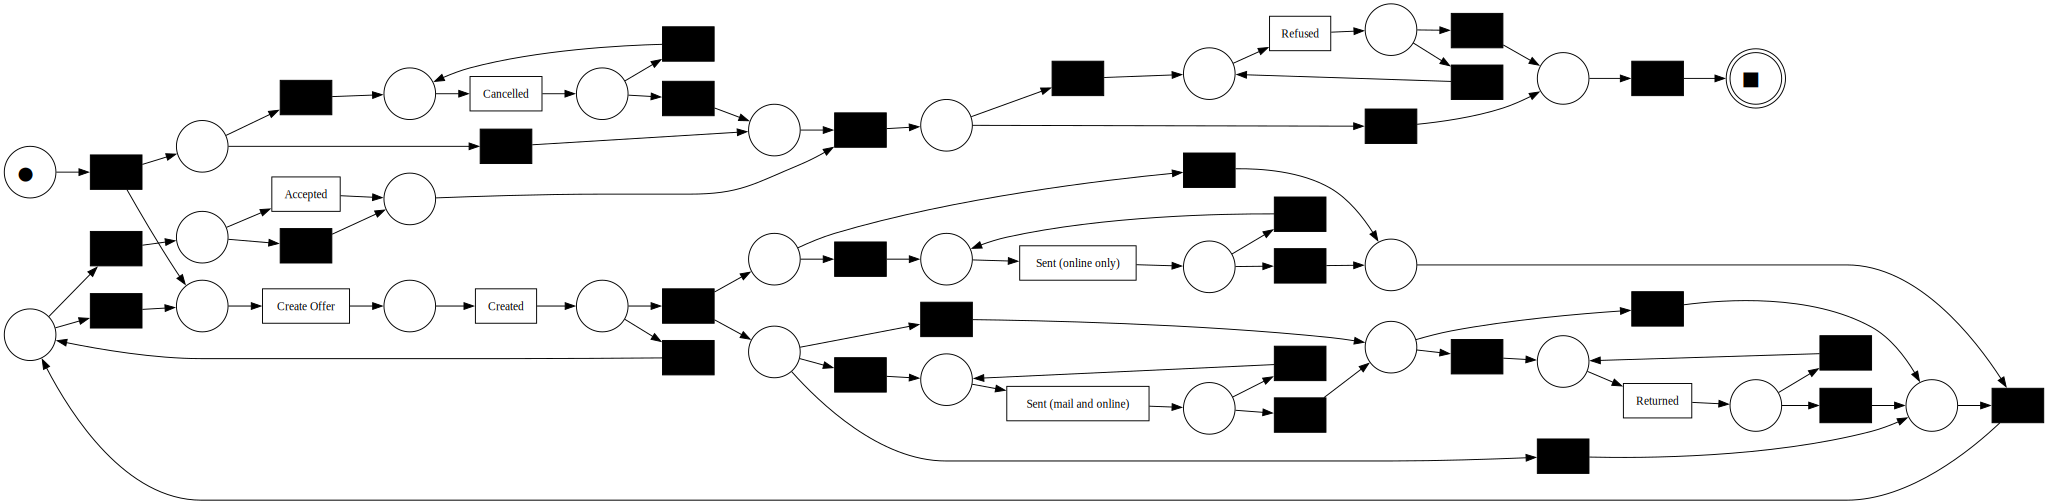

In [56]:
# Process Model full log
petriNet, initialMarking, finalMarking = pm4py.discovery.discover_petri_net_inductive(data)
pm4py.visualization.petri_net.visualizer.apply(petriNet, initialMarking, finalMarking)

#### Model Language
(Sensible and Nonsensical Traces)

In [ ]:
# in case you want to check something here, but no code required for this part

### Variants

In [ ]:
# plot showing percentage of cases covered by number of variants

minimum number of variants you need to cover 85% of cases

percentage of cases covered by the 2 most frequent variants

number of variants representing fewer than 10 cases

## Process Models

### Five Most Frequent Variants

In [ ]:
# event log with only 5 most frequent variants

In [ ]:
# process model of the five most frequent variants

In [ ]:
# fitness of process model

Model fitness per case

In [ ]:
# histogram of model fitness
bins = np.arange(0, 1.02, 0.02)

# add your code here

## Performance Analysis (Throughput Times)

- Only consider the 35 most frequent variants
- Throughput time of a case: case duration


In [ ]:
# event log with 35 most frequent variants

In [ ]:
# determine required information per variant (mean throughput time, number of offers)

In [ ]:
# create bar chart with throughput time per variant.

Throughput time and number of offers

In [ ]:
# box plot of throughput time vs. number of offers